In [1]:
########## IMPORT REQUIIRED LIBRARIES ##########
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from numba import njit
########## IMPORT UTILITY SCRIPTS ##############
import sys
sys.path.insert(0, '../../src')
sys.path.insert(0, '../Results')
from general_utils import *
from dsp_utils import *
from bss_utils import *
from numba_utils import *
######## IMPORT THE REQUIRED ALGORITHMS ########
from WSMBSS import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['Model'] == "CorInfoMax"][["rho", "trial", "seed", "S", "A", "X", "SNRinp"]]

In [3]:
ii = 2
rho = df_nnanti_results['rho'].iloc[ii]
trial = df_nnanti_results['trial'].iloc[ii]
seed_ = df_nnanti_results['seed'].iloc[ii]
S = df_nnanti_results['S'].iloc[ii]
A = df_nnanti_results['A'].iloc[ii]
X = df_nnanti_results['X'].iloc[ii]
WSM_INPUT_STD = 0.28
X = (WSM_INPUT_STD * (X / X.std(1)[:,np.newaxis]))

In [4]:
if rho > 0.4:
    gamma_start = 0.05
    gamma_stop = 5 * 1e-4
else:
    gamma_start = 0.1
    gamma_stop = 1e-3

gammaM_start = [gamma_start, gamma_start]
gammaM_stop = [gamma_stop, gamma_stop]
gammaW_start = [gamma_start, gamma_start]
gammaW_stop = [gamma_stop, gamma_stop]

OUTPUT_COMP_TOL = 1e-7
MAX_OUT_ITERATIONS = 3000
LayerGains = [1, 1]
LayerMinimumGains = [1e-3, 1e-3]
LayerMaximumGains = [1e6, 20]
WScalings = [0.0033, 0.0033]
GamScalings = [2, 1]
zeta = 1 * 1e-5
beta = 0.5
muD = [1, 1e-2]

s_dim = S.shape[0]
x_dim = X.shape[0]
h_dim = s_dim
samples = S.shape[1]
W_HX = np.eye(h_dim, x_dim)
W_YH = np.eye(s_dim, h_dim)

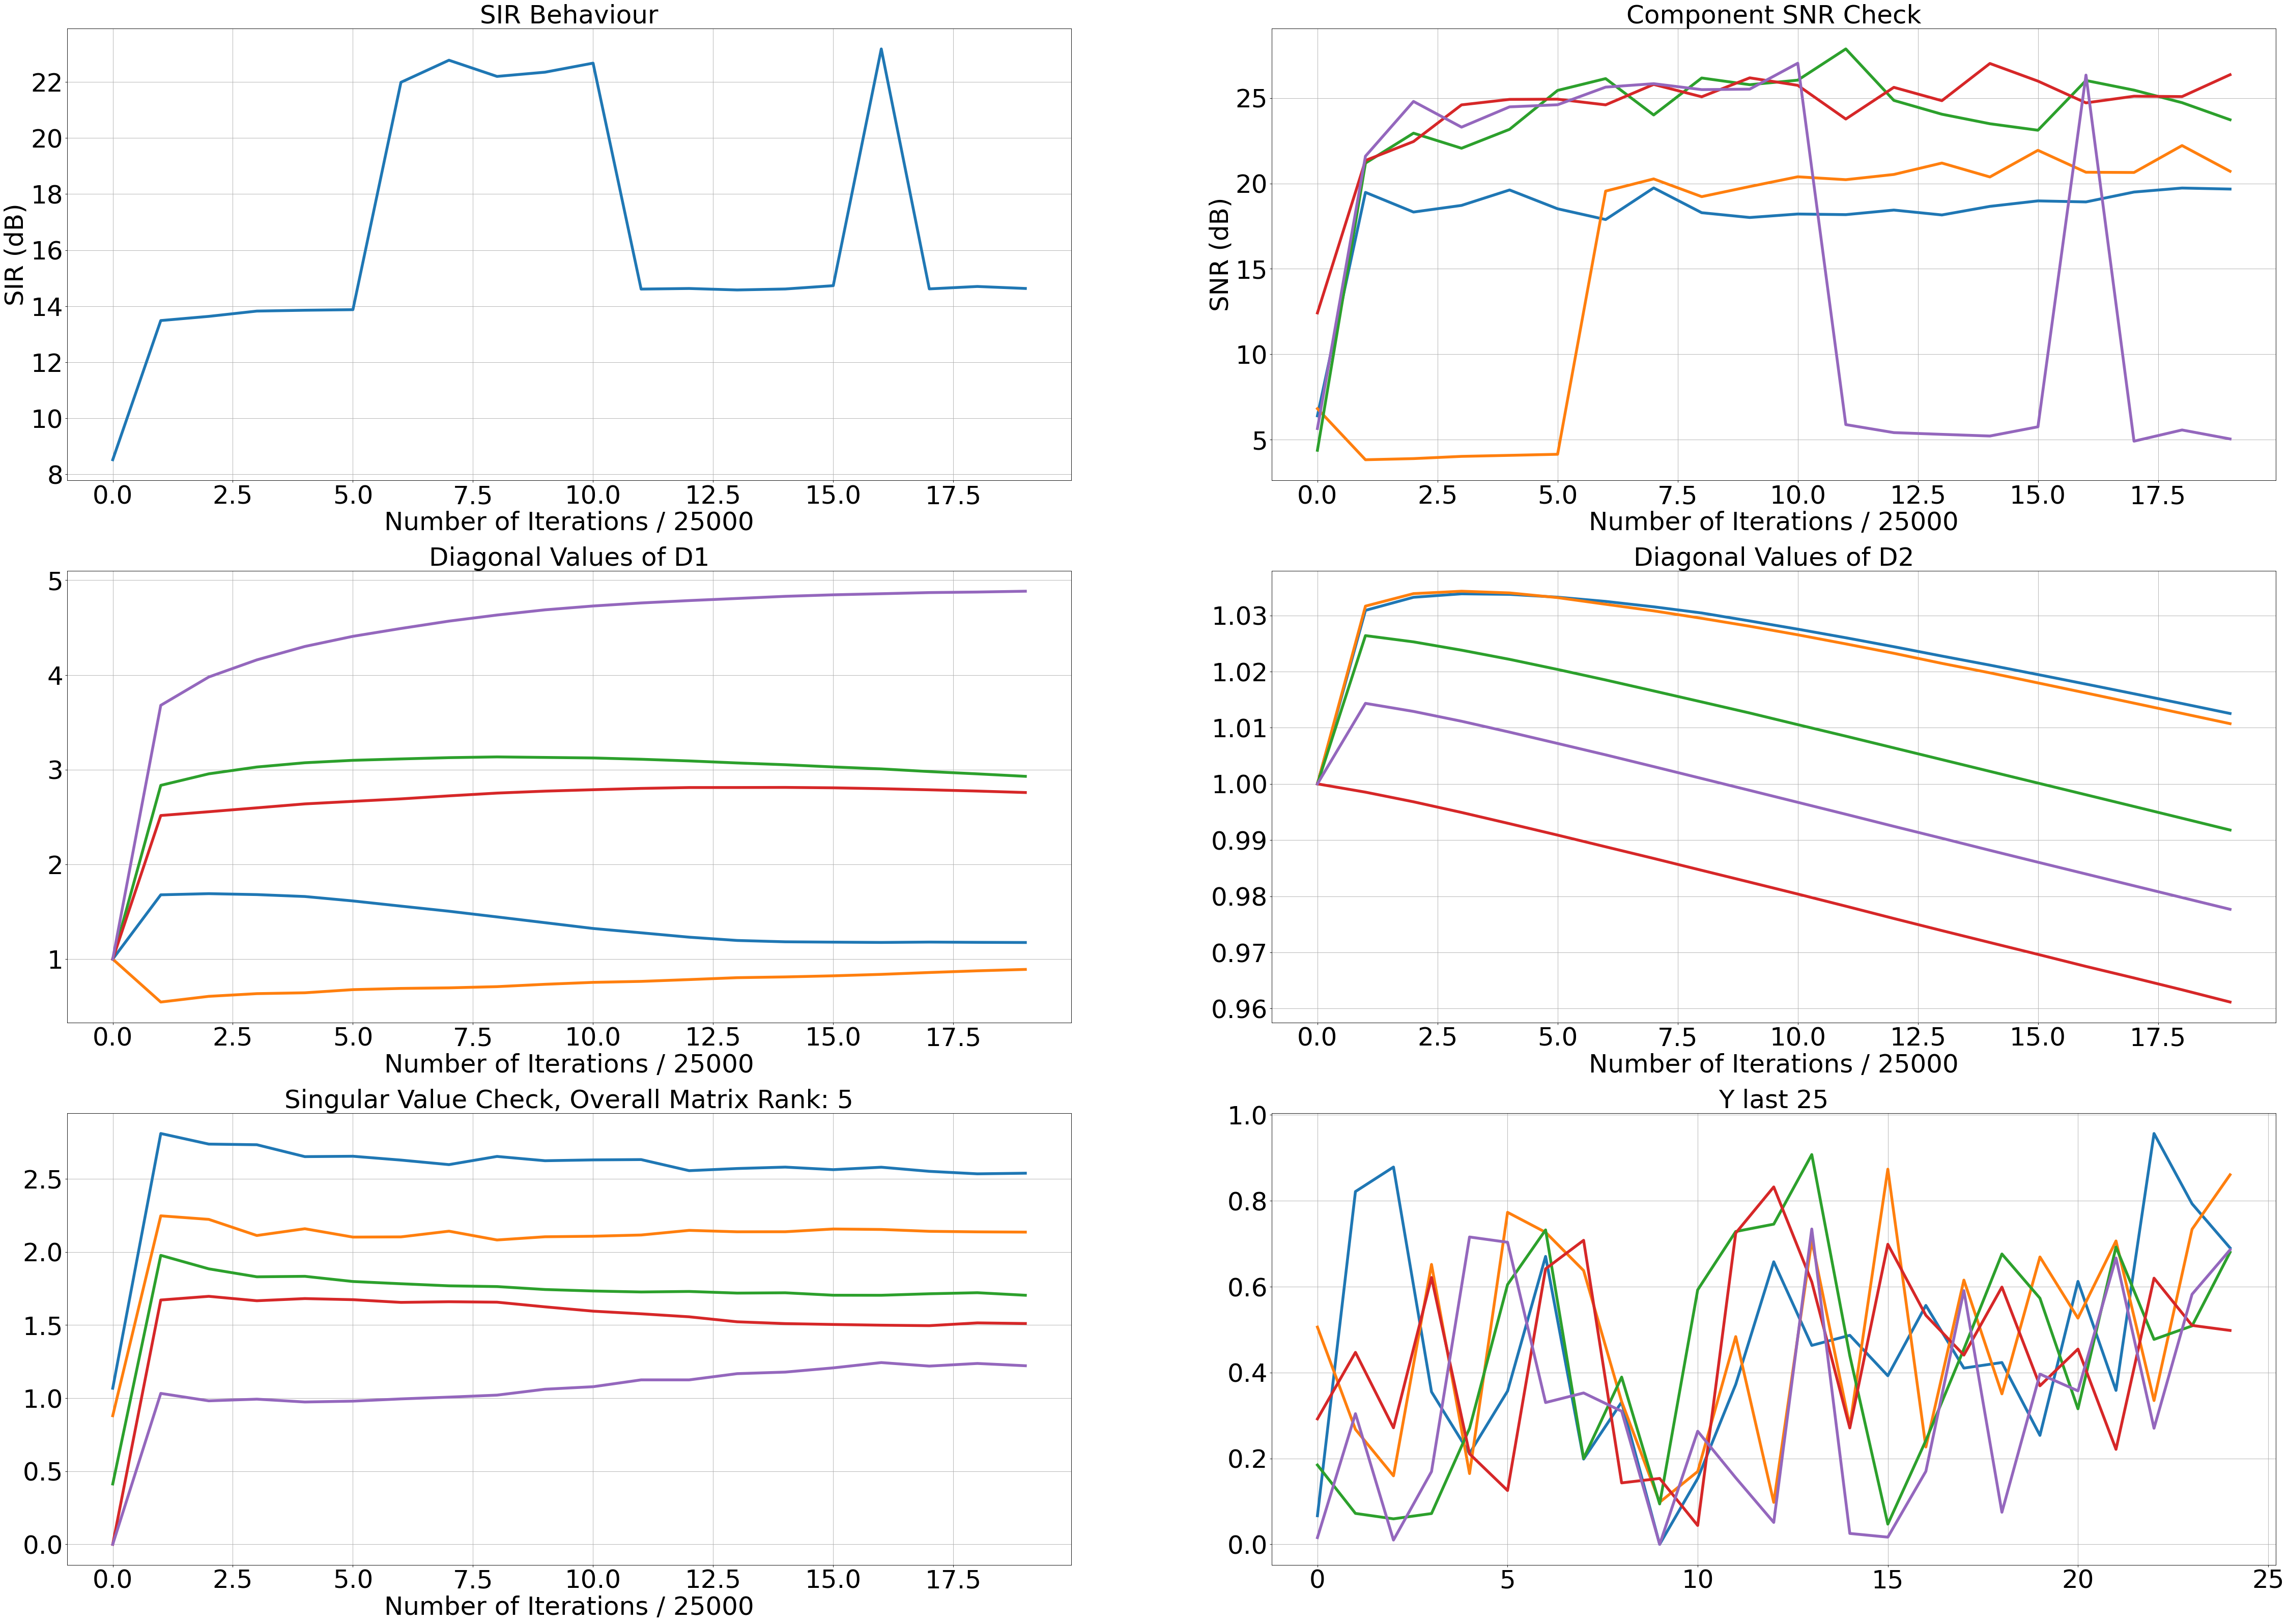

 98%|█████████▊| 488132/500000 [25:06<00:52, 226.00it/s]

In [ ]:
debug_iteration_point = 25000
modelWSM = OnlineWSMBSS(
    s_dim=s_dim,
    x_dim=x_dim,
    h_dim=h_dim,
    gammaM_start=gammaM_start,
    gammaM_stop=gammaM_stop,
    gammaW_start=gammaW_start,
    gammaW_stop=gammaW_stop,
    beta=beta,
    zeta=zeta,
    muD=muD,
    WScalings=WScalings,
    GamScalings=GamScalings,
    W_HX=W_HX,
    W_YH=W_YH,
    DScalings=LayerGains,
    LayerMinimumGains=LayerMinimumGains,
    LayerMaximumGains=LayerMaximumGains,
    neural_OUTPUT_COMP_TOL=OUTPUT_COMP_TOL,
    set_ground_truth=True,
    S=S,
    A=A,
)

modelWSM.fit_batch_nnantisparse(
    X,
    n_epochs=1,
    neural_dynamic_iterations=500,
    neural_lr_start=0.75,
    neural_lr_stop=0.05,
    synaptic_lr_decay_divider=1,
    debug_iteration_point=debug_iteration_point,
    plot_in_jupyter=True,
)